The plots below don't require rounding because the data are scattered or don't have any pattern. 

In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
#fitting regression line
def fit_regression_line(x, y):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.flatten(), y)
    return model, y_pred, slope, intercept, r_value, p_value, std_err, len(x)

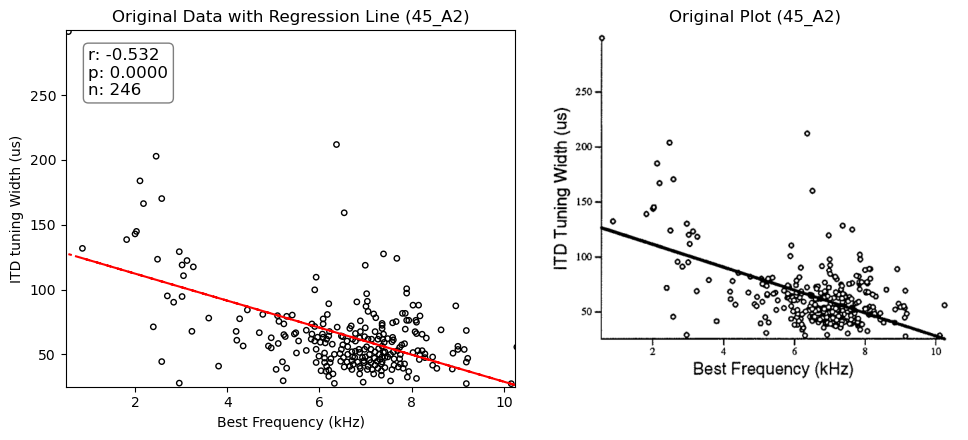

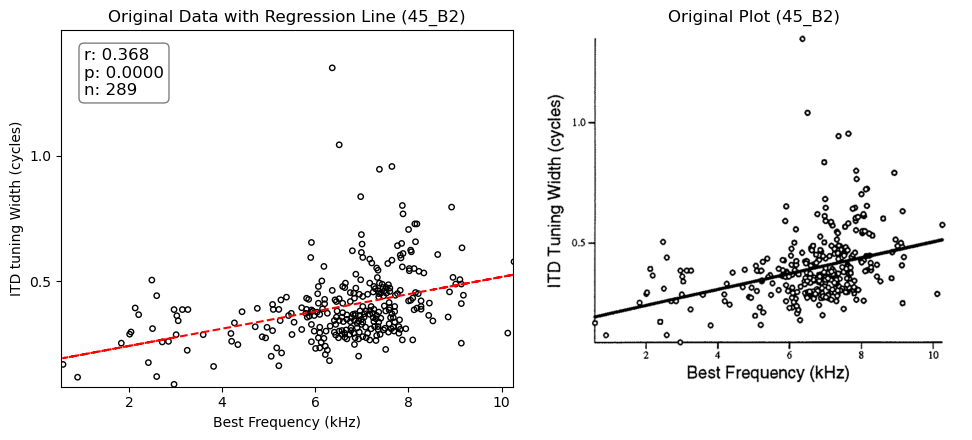

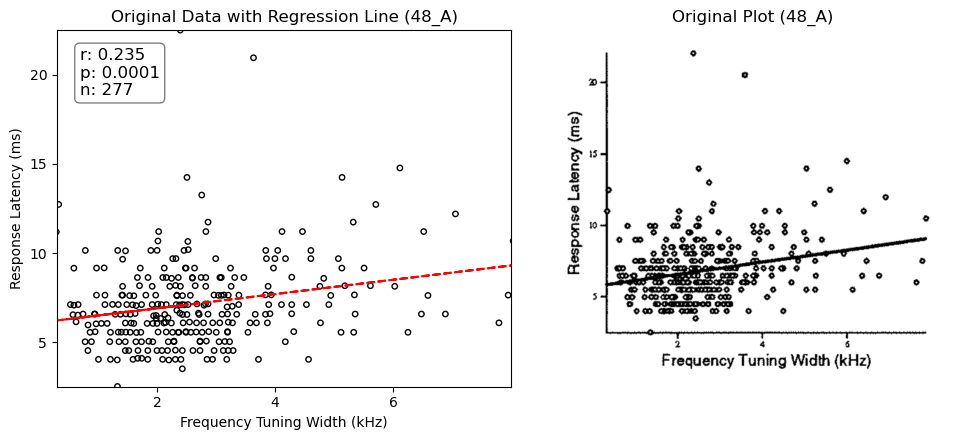

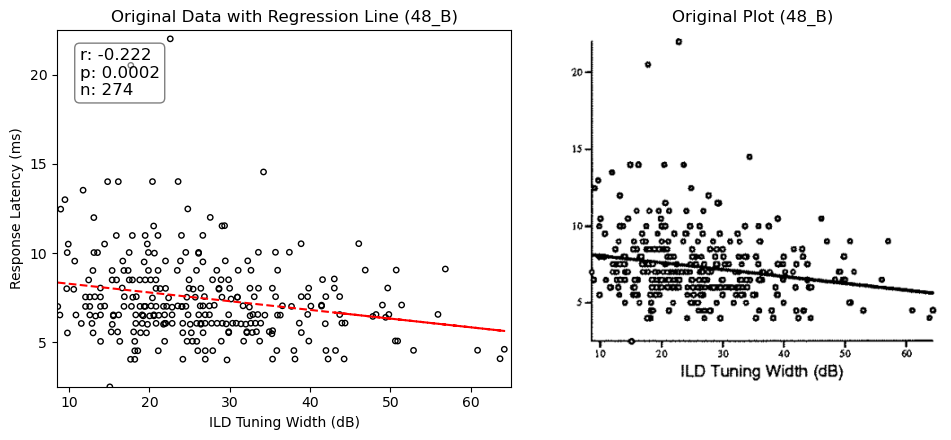

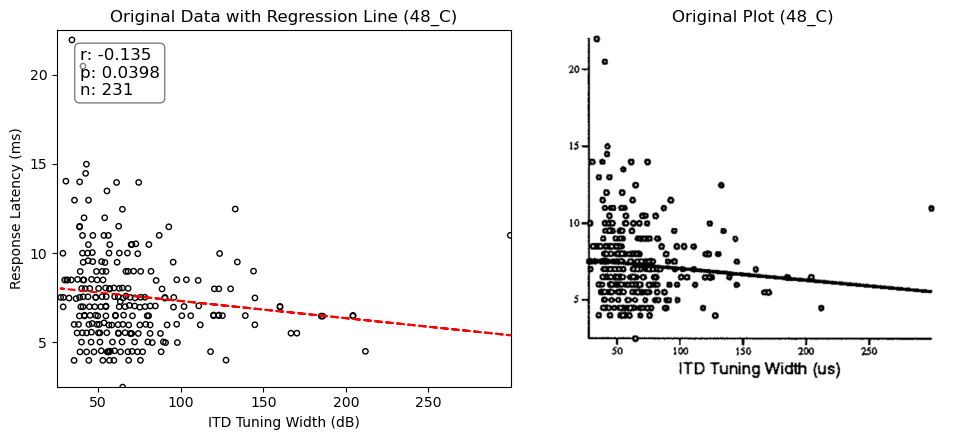

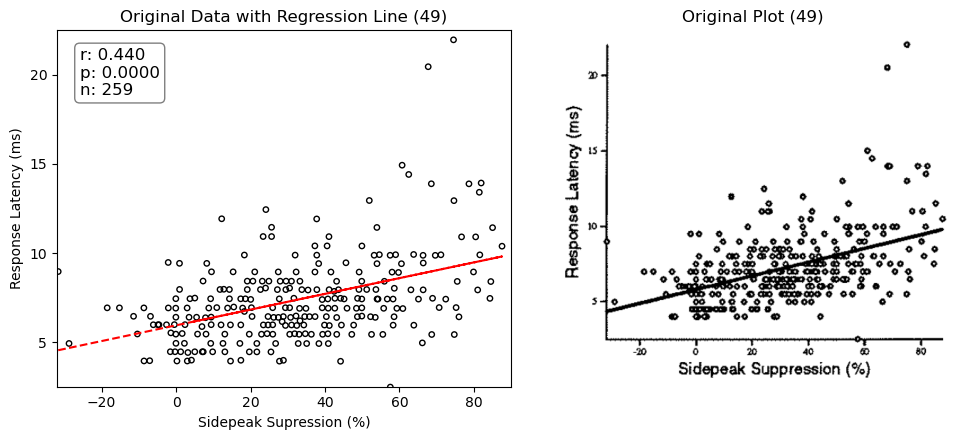

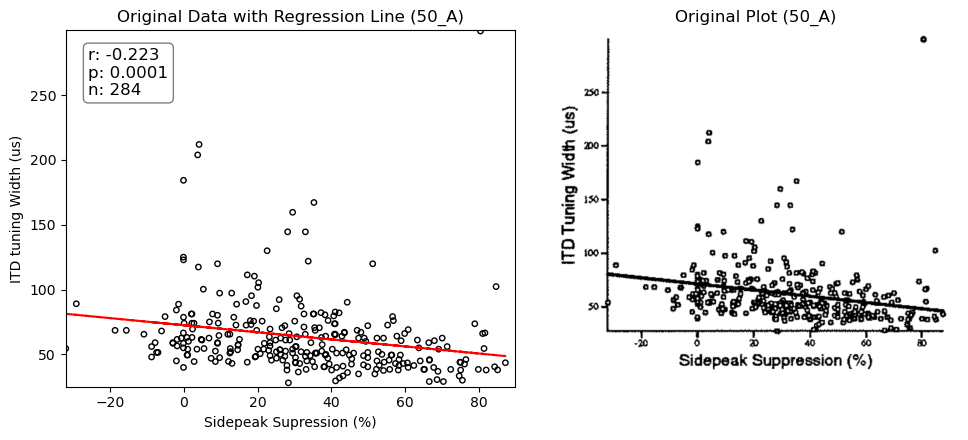

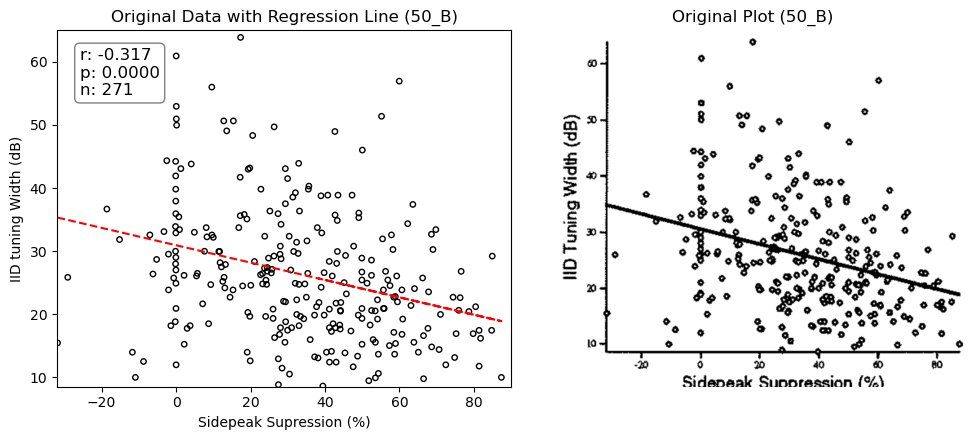

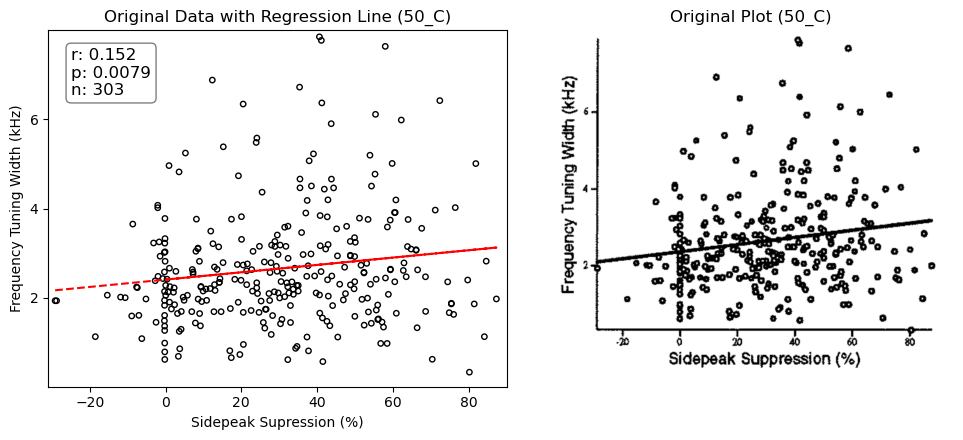

Regression plots created and saved in the 're-plotted_figures_with_regression_lines' directory.


In [3]:

# list of file names to re-plot
file_names = [
    "45_A2",
    "45_B2",
    "48_A",
    "48_B",
    "48_C",
    "49",
    "50_A",
    "50_B",
    "50_C"
]

# folder of original plot data files
data_dir = 'plot_data_files'

# folder of original plot images
image_dir = 'plot_images'

# Directory to save the re-plotted figures
output_dir = 're-plotted_figures_with_regression_lines'
os.makedirs(output_dir, exist_ok=True)

# dictionaries for scales, ticks, and axis labels
scales = {
    "45_A2": ((0.5, 10.25), (25, 300)),
    "45_B2": ((0.55, 10.25), (0.08, 1.5)),
    "48_A": ((0.3, 8), (2.5, 22.5)),
    "48_B": ((8.5, 65), (2.5,22.5)), 
    "48_C": ((25, 300), (2.5, 22.5)),
    "49": ((-32, 90), (2.5, 22.5)),
    "50_A": ((-32, 90), (25, 300)),
    "50_B": ((-32, 90), (8.5, 65)),
    "50_C": ((-31, 90), (0, 8))
}

xticks = {
    "45_A2": [2, 4, 6, 8, 10],
    "45_B2": [2, 4, 6, 8, 10],
    "48_A": [2, 4, 6],
    "48_B": [10, 20, 30, 40, 50, 60], 
    "48_C": [50, 100, 150, 200, 250],
    "49": [-20, 0, 20, 40, 60, 80],
    "50_A": [-20, 0, 20, 40, 60, 80],
    "50_B": [-20, 0, 20, 40, 60, 80],
    "50_C": [-20, 0, 20, 40, 60, 80]
}

yticks = {
    "45_A2": [50, 100, 150, 200, 250],
    "45_B2": [0.5, 1],
    "48_A":  [5, 10, 15, 20],
    "48_B": [5, 10, 15, 20],
    "48_C": [5, 10, 15, 20],
    "49": [5, 10, 15, 20],
    "50_A": [50, 100, 150, 200, 250],
    "50_B": [10, 20, 30, 40, 50, 60], 
    "50_C": [2, 4, 6]
}

axis_labels = {
    "45_A2": ('Best Frequency (kHz)', 'ITD tuning Width (us)'),
    "45_B2": ('Best Frequency (kHz)', 'ITD tuning Width (cycles)'),
    "48_A": ('Frequency Tuning Width (kHz)', 'Response Latency (ms)'),
    "48_B": ('ILD Tuning Width (dB)', 'Response Latency (ms)'),
    "48_C": ('ITD Tuning Width (dB)', 'Response Latency (ms)'),
    "49": ('Sidepeak Supression (%)', 'Response Latency (ms)'),
    "50_A": ('Sidepeak Supression (%)', 'ITD tuning Width (us)'),
    "50_B":  ('Sidepeak Supression (%)', 'IID tuning Width (dB)'),
    "50_C": ('Sidepeak Supression (%)', 'Frequency Tuning Width (kHz)'),
}

# looping through each plot file to create re-plotted figures with regression lines
for plot_file in file_names:
    x_points = []
    y_points = []

    file_path = os.path.join(data_dir, f'{plot_file}.csv')
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            x, y = map(float, row)
            x_points.append(x)
            y_points.append(y)

    x_scale, y_scale = scales[plot_file]
    xticks_vals = xticks[plot_file]
    yticks_vals = yticks[plot_file]
    x_label, y_label = axis_labels[plot_file]

    # Fit regression line
    model, y_pred, slope, intercept, r_value, p_value, std_err, n = fit_regression_line(x_points, y_points)

    # Create plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

    # Plot original data with regression line
    ax1.scatter(x_points, y_points, edgecolor='black', facecolor='none', s=15)
    ax1.plot(x_points, y_pred, color='red', linestyle='--')
    ax1.set_xlim(x_scale)
    ax1.set_ylim(y_scale)
    ax1.set_xticks(xticks_vals)
    ax1.set_yticks(yticks_vals)
    ax1.set_title(f'Original Data with Regression Line ({plot_file})')
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)

    # Display regression statistics on the plot
    stats_text = (f'r: {r_value:.3f}\np: {p_value:.4f}\nn: {n}')
    ax1.text(0.05, 0.95, stats_text, transform=ax1.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    
    #displaying the original plot here
    original_plot_path = os.path.join(image_dir, f'{plot_file}.png')
    original_img = plt.imread(original_plot_path)
    ax2.imshow(original_img)
    ax2.axis('off')
    ax2.set_title(f'Original Plot ({plot_file})')

    # Save the plot
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'{plot_file}_regression.png'))
    plt.show()
    plt.close()

print("Regression plots created and saved in the 're-plotted_figures_with_regression_lines' directory.")
